# Question 1
## Regression Recap

Solve this question on Kaggle! Submit your predictions in Kaggle. Download the notebook and submit it separately along with the other questions.

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

Use everything that you have learnt so far.

Analyse the data. Drop, scale or normalize features. Merge features if they correlated to make some meaningful features. Use PCA to reduce the dimensionality of the problem.

Try out all the regression models. Use cross validation to find best parameters for each model.


# Question 2
## Developing an Artificial Neural Network from Scratch.

In this notebook, we will be developing a fully connected feedforward neural network.

We will import the MNIST dataset from keras datsets. The MNIST dataset contains images of 28x28 pixels each having values ranging from 0-255. It has 60000 images in the training set and 10000 images in the test set. However, we will only use the first 10000 images for training and first 1000 images for testing because our code isn't optimized and it takes time to run. We are not looking for accuracy of our network right now, we will be doing that in the next question when we will be implementing the same using Tensorflow.

Run the first 3 cells. Your code begins after that.


In [145]:
import numpy as np
from keras.datasets import mnist
import random

In [146]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As discussed in the class, the images are flattened to a column.

Then we are normalizing them by dividing by 255.


In [147]:
train_X=train_X.reshape(60000,784,1)    # flattening
test_X=test_X.reshape(10000,784,1)

train_y=train_y.reshape(60000,1)
test_y=test_y.reshape(10000,1)

train_X= train_X/255
test_X = test_X/255

train_X=train_X[:10000]         #taking the first 10000 images.
train_y=train_y[:10000]
test_X=test_X[:1000]
test_y=test_y[:1000]
train_data=list(zip(train_X,train_y))
test_data=list(zip(test_X,test_y))

## 2.1 Write the code for Sigmoid Function.

In [148]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

## 2.2 The Network

We will making a class called Network which has certain functions inside it. The cost function used is Cross-Entropy Loss. You need to code only the first 3. Rest are done for you. There are various places within the code marked as stop_zone. Read the instructions below the code at those places to check whether your code till there is correct or not.


In [149]:
# 2.1 Sigmoid Function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# 2.2 The Network
class Network(object):
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(sizes)
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]

    def forwardpropagation(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

    def backpropagation(self, x, y):
        y_t = np.zeros((10, 1))
        y_t[y] = 1
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        activation = x
        activation_list = [x]
        zs = []

        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activation_list.append(activation)

        delta = self.cost_derivative(activation_list[-1], y_t) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activation_list[-2].transpose())

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activation_list[-l-1].transpose())
        return (nabla_b, nabla_w)

    def SGD(self, train_data, epochs, mini_batch_size, lr):
        n_train = len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k+mini_batch_size] for k in range(0, n_train, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, lr)
            self.predict(train_data)
            print("Epoch {0} completed.".format(i+1))

    def update_mini_batch(self, mini_batch, lr):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backpropagation(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(lr/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(lr/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]

    def predict(self, test_data):
        test_results = [(np.argmax(self.forwardpropagation(x)), y) for (x, y) in test_data]
        num = sum(int(x == y) for (x, y) in test_results)
        print ("{0}/{1} classified correctly.".format(num, len(test_data)))

    def cost_derivative(self, output_activations, y):
        return (output_activations - y)
    
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))


In [150]:
net=Network([784,128,64,10])
net.SGD(train_data=train_data, epochs=10, mini_batch_size=20, lr=0.01)
print("Test data:")
net.predict(test_data)



# Question 3

    Load the MNIST dataset as in the previous question.
    Visualize the first 20 images of both train and test data using plt.imshow()
    Choose any of tensorflow and pytorch.
    The architecture :

    input layer (optional)
    flatten layer
    some hidden dense layers (tensorflow)
    OR
    some linear layers with non linear activation (pytorch)
    output dense/linear layer of 10 neurons.

    For Tensorflow or PyTorch, you may either use Sequential API or Functional API to define the model.

However, for PyTorch, you need to load the data as a torch Dataset and access using a DataLoader function and then iterate over the data to train.

    Normalize the images before training.
    While training, use Adam Optimizer and Sparse Categorical Cross Entropy Loss function (Tensorflow) / Cross Entropy Loss (Pytorch).



     


## Using TensorFlow

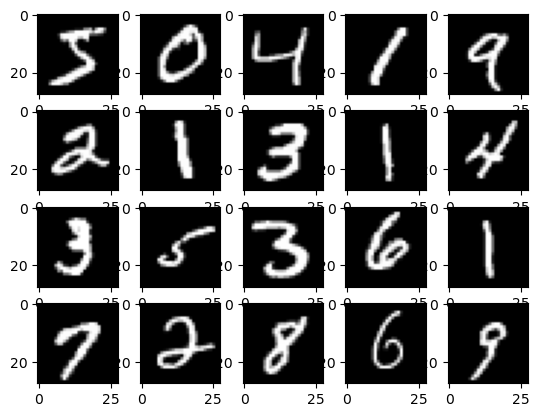

In [151]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualize the first 20 images from the training set
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()


In [152]:
# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10)
])

# Compile the model
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2394 - accuracy: 0.9293
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1006 - accuracy: 0.9698
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0694 - accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0413 - accuracy: 0.9865


In [153]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 1s - loss: 0.0710 - accuracy: 0.9774 - 549ms/epoch - 2ms/step


## Using PyTorch

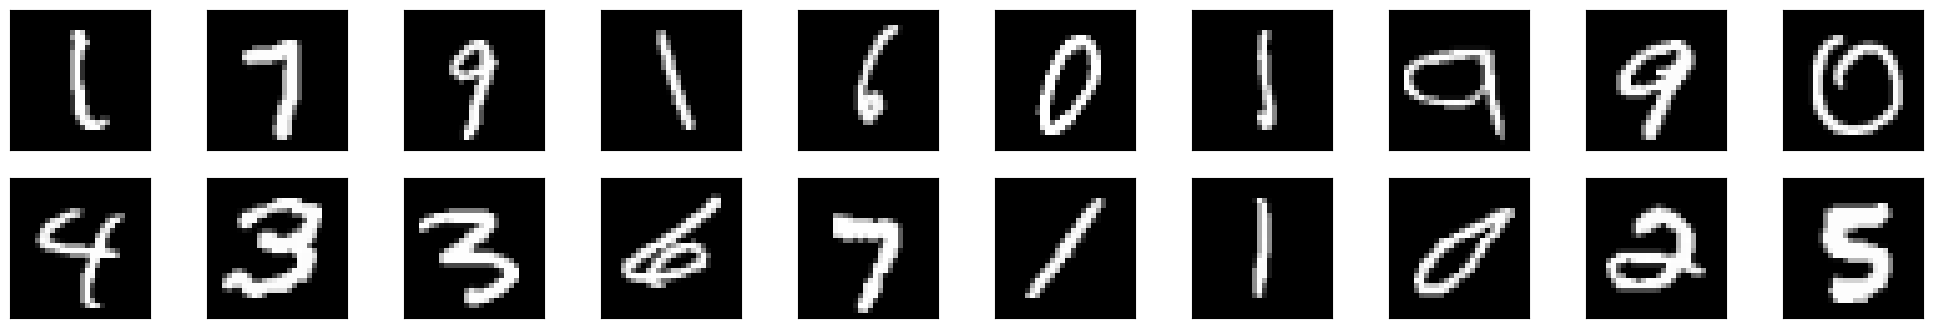

In [154]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

# Create iterator
dataiter = iter(train_loader)

try:
    images, labels = next(dataiter)
except StopIteration:
    dataiter = iter(train_loader)
    images, labels = next(dataiter)

images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
plt.show()


In [155]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # We need to import this for the activation function
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(28*28, 128)
        self.output = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.hidden(x))  # F.relu is used here
        x = self.output(x)
        return x

# Initialize the model
model = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(5): 
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()


In [156]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 96 %
